<a href="https://colab.research.google.com/github/nitinpatil301a/Tensorflow-Keras-Work/blob/master/Kaggle_dog_cat_image_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.0.0
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


In [0]:
test_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [0]:
img_width = 28
img_height = 28
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size = (img_width, img_height),
                                              classes = ['dogs', 'cats'],
                                              class_mode = 'binary',
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [0]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir,
                                                   target_size = (img_width, img_height),
                                                   classes = ['dogs', 'cats'],
                                                   class_mode = 'binary',
                                                   batch_size = batch_size)

Found 5000 images belonging to 2 classes.


In [0]:
len(train_generator)*batch_size

20000

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform',input_shape = (img_width, img_height, 3)))
model.add(MaxPool2D(3,3))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 5184)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               663680    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 665,601
Trainable params: 665,601
Non-trainable params: 0
_______________________________________________

In [0]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 10, 
                              validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/10
1000/1000 [==============================] - 86s 86ms/step - loss: 0.6980 - accuracy: 0.5114 - val_loss: 0.6923 - val_accuracy: 0.5260
Epoch 2/10
1000/1000 [==============================] - 85s 85ms/step - loss: 0.6886 - accuracy: 0.5315 - val_loss: 0.6653 - val_accuracy: 0.6012
Epoch 3/10
1000/1000 [==============================] - 85s 85ms/step - loss: 0.6643 - accuracy: 0.6004 - val_loss: 0.6211 - val_accuracy: 0.6524
Epoch 4/10
1000/1000 [==============================] - 84s 84ms/step - loss: 0.6158 - accuracy: 0.6620 - val_loss: 0.5880 - val_accuracy: 0.6876
Epoch 5/10
1000/1000 [==============================] - 85s 85ms/step - loss: 0.5743 - accuracy: 0.7014 - val_loss: 0.5395 - val_accuracy: 0.7372
Epoch 6/10
1000/1000 [==============================] - 84s 84ms/step - loss: 0.5442 - accuracy: 0.7240 - val_loss: 0.5232 - val_accuracy: 0.7452
Epoch 7/10
1000/1000 [=======

In [0]:
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1, 11)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

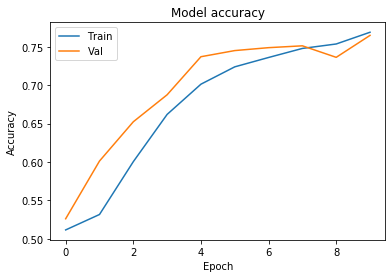

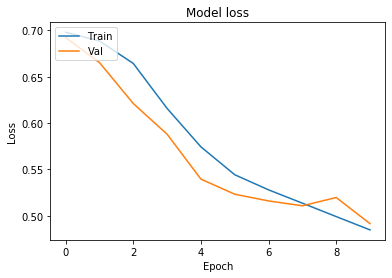

In [0]:
plot_learningCurve(history)

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

#model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

#model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2304)            

In [0]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 10, 
                              validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/10
1000/1000 [==============================] - 169s 169ms/step - loss: 0.6449 - accuracy: 0.6212 - val_loss: 0.5411 - val_accuracy: 0.7320
Epoch 2/10
1000/1000 [==============================] - 168s 168ms/step - loss: 0.5390 - accuracy: 0.7260 - val_loss: 0.4919 - val_accuracy: 0.7564
Epoch 3/10
1000/1000 [==============================] - 168s 168ms/step - loss: 0.4749 - accuracy: 0.7706 - val_loss: 0.5813 - val_accuracy: 0.7414
Epoch 4/10
1000/1000 [==============================] - 167s 167ms/step - loss: 0.4309 - accuracy: 0.7987 - val_loss: 0.4648 - val_accuracy: 0.7814
Epoch 5/10
1000/1000 [==============================] - 170s 170ms/step - loss: 0.3915 - accuracy: 0.8257 - val_loss: 0.4388 - val_accuracy: 0.7914
Epoch 6/10
1000/1000 [==============================] - 171s 171ms/step - loss: 0.3515 - accuracy: 0.8424 - val_loss: 0.4893 - val_accuracy: 0.7744
Epoch 7/10
1000/1

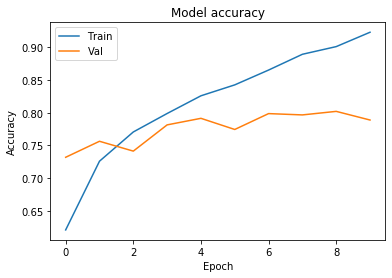

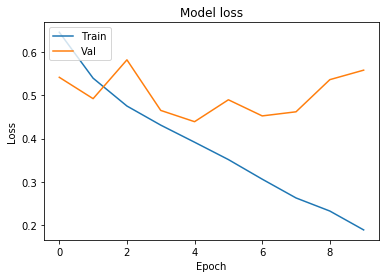

In [0]:
plot_learningCurve(history)

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape = (img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

#model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

#model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 64)        1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 128)       

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs = 10,
                              validation_data=validation_generator, validation_steps=len(validation_generator), verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/10
1000/1000 [==============================] - 193s 193ms/step - loss: 0.6956 - accuracy: 0.6122 - val_loss: 0.6128 - val_accuracy: 0.6792
Epoch 2/10
1000/1000 [==============================] - 195s 195ms/step - loss: 0.6194 - accuracy: 0.6714 - val_loss: 0.5472 - val_accuracy: 0.7214
Epoch 3/10
1000/1000 [==============================] - 194s 194ms/step - loss: 0.5705 - accuracy: 0.7083 - val_loss: 0.5236 - val_accuracy: 0.7498
Epoch 4/10
1000/1000 [==============================] - 195s 195ms/step - loss: 0.5434 - accuracy: 0.7294 - val_loss: 0.5969 - val_accuracy: 0.6652
Epoch 5/10
1000/1000 [==============================] - 198s 198ms/step - loss: 0.5209 - accuracy: 0.7430 - val_loss: 0.6277 - val_accuracy: 0.6828
Epoch 6/10
1000/1000 [==============================] - 191s 191ms/step - loss: 0.4979 - accuracy: 0.7580 - val_loss: 0.4444 - val_accuracy: 0.7888
Epoch 7/10
 493/1

KeyboardInterrupt: ignored

In [0]:
plot_learningCurve(history)